In [1]:
# import packages
!pip install dmba
import dmba
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from dmba import plotDecisionTree, classificationSummary, liftChart, gainsChart

     |████████████████████████████████| 11.8 MB 5.2 MB/s 
no display found. Using non-interactive Agg backend


In [2]:
# load dataset
df = dmba.load_data('eBayAuctions.csv')

In [3]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [5]:
predictors = ['Category','currency','sellerRating','Duration','endDay','ClosePrice','OpenPrice']
outcome = 'Competitive?'

In [6]:
X = pd.get_dummies(df[predictors])
y = df['Competitive?']

In [7]:
# partition the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [8]:
# Run with default tree
defaultTree = DecisionTreeClassifier(random_state = 1)

In [9]:
defaultTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [10]:
classes = defaultTree.classes_

In [26]:
classificationSummary(y_valid, defaultTree.predict(X_valid), class_names = classes)

Confusion Matrix (Accuracy 0.8720)

       Prediction
Actual   0   1
     0 309  44
     1  57 379


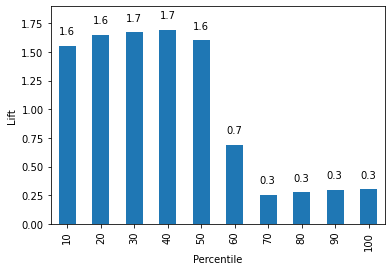

In [27]:
# Create the information for the lift chart
proba = defaultTree.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': defaultTree.predict(X_valid) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['actual'], title=False)
plt.show()
# the lift on the first decile is 1.6

In [28]:
# run a boosted tree
boostedTree = AdaBoostClassifier(DecisionTreeClassifier(random_state = 1), n_estimators=100, random_state=1)

In [29]:
boostedTree.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                   n_estimators=100, random_state=1)

In [30]:
classificationSummary(y_valid, boostedTree.predict(X_valid), class_names = classes)

Confusion Matrix (Accuracy 0.8682)

       Prediction
Actual   0   1
     0 315  38
     1  66 370


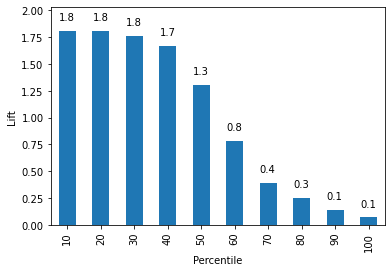

In [31]:
# Create the information for the lift chart
proba = boostedTree.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': boostedTree.predict(X_valid) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['actual'], title=False)
plt.show()
# the lift on the first decile is 1.8

In [32]:
# run a bagging tree
bagging = BaggingClassifier(DecisionTreeClassifier(random_state = 1), n_estimators=100, random_state=1)

In [33]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [34]:
classificationSummary(y_valid, bagging.predict(X_valid), class_names = classes)

Confusion Matrix (Accuracy 0.8999)

       Prediction
Actual   0   1
     0 334  19
     1  60 376


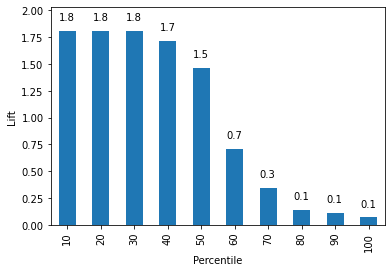

In [35]:
# Create the information for the lift chart
proba = bagging.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': bagging.predict(X_valid) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['actual'], title=False)
plt.show()
# the lift on the first decile is 1.8

In [37]:
# run a random forest
rforest = RandomForestClassifier(n_estimators=500, random_state=1)

In [38]:
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [39]:
classificationSummary(y_valid, rforest.predict(X_valid), class_names = classes)

Confusion Matrix (Accuracy 0.8682)

       Prediction
Actual   0   1
     0 320  33
     1  71 365


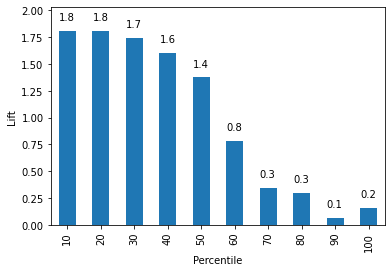

In [40]:
# Create the information for the lift chart
proba = rforest.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': rforest.predict(X_valid) })

df = result.sort_values(by=['p(1)'], ascending=False)
liftChart(df['actual'], title=False)
plt.show()
# the lift on the first decile is 1.8

In [41]:
# The bagged tree had a better accuracy than the random forest at .8999 to .8682
# Random forests are conceptually different because while both draw from using random samples, random forests also use random subsets of predictors for each sample. Bagged trees on the other hand use the same predictors for each sample.